In [1]:
import pandas as pd #load and manipulate data and for one-hot encoding
import numpy as np # calculate the mean and standard deviation
import graphviz #graphviz
import lightgbm as lgb
from sklearn.model_selection import train_test_split #split data into training and testing
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring during
from sklearn.model_selection import GridSearchCV #cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn. metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#데이터 다운로드
df = pd.read_excel(r'C:\Users\Hon Kim\Desktop\관광통계\2019년_국민여행조사_원자료\dfr.xlsx', index = True) #불필요한 열 삭제
df.drop(['ID'],axis=1,inplace=True)

#일부 데이터 정수형변환
df['JEJU']=df['JEJU'].astype(int)
df['KYUNG_S']=df['KYUNG_S'].astype(int)
df['KYUNG_N']=df['KYUNG_N'].astype(int)
df['JEON_S']=df['JEON_S'].astype(int)
df['JEON_N']=df['JEON_N'].astype(int)
df['CHOONG_S']=df['CHOONG_S'].astype(int)
df['CHOONG_N']=df['CHOONG_N'].astype(int)
df['GANGWON']=df['GANGWON'].astype(int)
df['KYUNGGI']=df['KYUNGGI'].astype(int)
df['SEJONG']=df['SEJONG'].astype(int)
df['ULSAN']=df['ULSAN'].astype(int)
df['DAEJEON']=df['DAEJEON'].astype(int)
df['GWANGJU']=df['GWANGJU'].astype(int)
df['INCHEON']=df['INCHEON'].astype(int)
df['DAEGU']=df['DAEGU'].astype(int)
df['BUSAN']=df['BUSAN'].astype(int)
df['SEOUL']=df['SEOUL'].astype(int)

#데이터 구성요소확인
df['pre_food'].unique()

#결측치 처리
df=df.fillna(0)

#결측치 처리 확인(multi-hot encoding)
df['pre_food'].unique()


array([0., 2.])

In [3]:
#만족도, 재방문률, 추천정도 변수를 합쳐
#타겟변수설정
point = df['Satify']+df['revisit']+df['recommend']

#point2 = point >= 15
#(point2.values==True).sum()

#point2 = point >= 14
#(point2.values==True).sum()

#point2 = point >= 13
#(point2.values==True).sum()

point2 = point >= 12
(point2.values==True).sum()

#point2 = point >= 11
#(point2.values==True).sum()

#point2 = point >= 10
#(point2.values==True).sum()

7852

In [4]:
#데이터 프레임 상 타겟변수 제거
df.drop(['Satify'],axis=1,inplace=True)
df.drop(['revisit'],axis=1,inplace=True)
df.drop(['recommend'],axis=1,inplace=True)
df.head()

,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,cost_fishing,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
0,4,1,1,100000.0,1,100000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,3,1,1,250000.0,1,250000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
2,3,1,0,50001.0,3,16667.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,3,1,1,120000.0,1,120000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,2,1,2,350001.0,3,116667.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, point2, random_state=42, stratify = point2)

In [6]:
params = {
    'boosting_type' : 'gbdt',
    'objective' : 'multiclass',
    'metric' : 'multi_logloss'
    ,'num_class' : 2,
    'min_data' : 1    
}
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)
gbm = lgb.train(params, lgb_train, num_boost_round = 100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4117
[LightGBM] [Info] Number of data points in the train set: 7877, number of used features: 335
[LightGBM] [Info] Start training from score -1.376818
[LightGBM] [Info] Start training from score -0.290861


In [7]:
predictions = gbm.predict(X_train)
index = 0
total = 0
correct = 0
for prediction in predictions:
    if np.argmax(prediction) == 1:
        p = "Satisfied"
    else:
        p = "Not Satisfied"

    #------------------------

    a = y_train.values[index]

    if a == True:
        a = "Satisfied"
    else:
        a = "Not Satisfied"
    #------------------------
    if( a == p):
        correct += 1
    index = index + 1
    total = total + 1
print("train Accuracy: %.2f%%" % ((float(correct / total)) * 100.0))

predictions = gbm.predict(X_test)
index = 0
total = 0
correct = 0
for prediction in predictions:
    if np.argmax(prediction) == 1:
        p = "Satisfied"
    else:
        p = "Not Satisfied"

    #------------------------

    a = y_test.values[index]

    if a == True:
        a = "Satisfied"
    else:
        a = "Not Satisfied"
    #------------------------
    if( a == p):
        correct += 1
    index = index + 1
    total = total + 1
print("test Accuracy: %.2f%%" % ((float(correct / total)) * 100.0))


train Accuracy: 94.43%
test Accuracy: 87.55%


In [67]:
predictions = gbm.predict(X_train)

In [68]:
index = 0
total = 0
correct = 0
for prediction in predictions:
    if np.argmax(prediction) == 1:
        p = "Satisfied"
    else:
        p = "Not Satisfied"
        
    #------------------------

    a = y_train.values[index]

    if a == True:
        a = "Satisfied"
    else:
        a = "Not Satisfied"
    #------------------------
    print("Prediction: ", p, " whereas actual is ", a)
    if( a == p):
        correct += 1
    index = index + 1
    total = total + 1
print("train Accuracy: %.2f%%" % ((float(correct / total)) * 100.0))


Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  wh

Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  S

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied

Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Pr

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  wh

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Predic

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satis

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satis

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  wh

Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction

Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  wh

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Predic

Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Predic

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  S

Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfie

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Pr

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satis

In [70]:
predictions = gbm.predict(X_test)

In [71]:
index = 0
total = 0
correct = 0
for prediction in predictions:
    if np.argmax(prediction) == 1:
        p = "Satisfied"
    else:
        p = "Not Satisfied"
        
    #------------------------

    a = y_test.values[index]

    if a == True:
        a = "Satisfied"
    else:
        a = "Not Satisfied"
    #------------------------
    print("Prediction: ", p, " whereas actual is ", a)
    if( a == p):
        correct += 1
    index = index + 1
    total = total + 1
print("train Accuracy: %.2f%%" % ((float(correct / total)) * 100.0))


Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satis

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  wh

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  wherea

In [ ]:
x = df.values

In [5]:
y = point.values

In [6]:
x

array([[4., 1., 1., ..., 0., 1., 0.],
       [3., 1., 1., ..., 1., 0., 0.],
       [3., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 2., 0., ..., 0., 0., 0.],
       [1., 2., 2., ..., 0., 0., 0.],
       [1., 2., 2., ..., 0., 0., 0.]])

In [7]:
y

array([11., 12., 12., ...,  0.,  0.,  0.])

In [31]:
len(point.unique())

11

In [34]:
predictions = gbm.predict(x)

In [35]:
predictions

array([[8.82217011e-04, 8.56609528e-16, 8.56609528e-16, ...,
        1.25097795e-01, 1.71182133e-02, 1.19283259e-02],
       [9.31919876e-04, 8.89610093e-16, 8.89610093e-16, ...,
        5.83240955e-02, 1.54328553e-02, 7.60773928e-03],
       [8.14857980e-04, 7.89695702e-16, 7.89695702e-16, ...,
        2.37802273e-01, 3.13485262e-02, 1.29771583e-02],
       ...,
       [9.99035647e-01, 1.50623802e-17, 1.50623802e-17, ...,
        1.59931372e-04, 1.75833979e-04, 1.81122162e-04],
       [9.99017468e-01, 1.50621061e-17, 1.50621061e-17, ...,
        2.85257634e-04, 1.14471374e-04, 1.45651208e-04],
       [9.99067740e-01, 1.50628641e-17, 1.50628641e-17, ...,
        1.75688955e-04, 1.25980549e-04, 1.53988979e-04]])

In [43]:
index = 0
total = 0
correct = 0
for prediction in predictions:
    if np.argmax(prediction) >= 12:
        p = "Satisfied"
    else:
        p = "Not Satisfied"
        
    #------------------------

    a = y[index]

    if a >= 12:
        a = "Satisfied"
    else:
        a = "Not Satisfied"
    #------------------------
    print("Prediction: ", p, " whereas actual is ", a)
    if( a == p):
        correct += 1
    index = index + 1
    total += 1

print(correct / total)

Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Sati

Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  wh

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual

Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  wh

Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas ac

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  wh

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  wherea

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas act

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  wherea

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  wherea

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Sat

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  wh

Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  whereas actual is  Satisfied
Prediction:  Satisfied  wherea

Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfi

Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfi

Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfied  whereas actual is  Not Satisfied
Prediction:  Not Satisfi

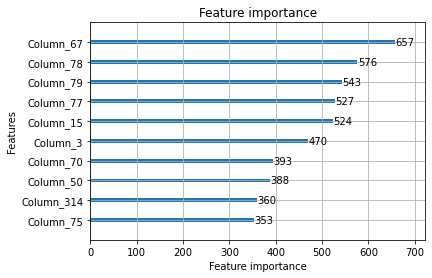

In [37]:
ax = lgb.plot_importance(gbm, max_num_features = 10)
plt.show()

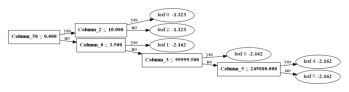

In [38]:
ax = lgb.plot_tree(gbm)
plt.show()

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [8]:
for column in df.columns:
    print(column, "->",df[column].dtypes)
    
    if df[column].dtypes == 'object':
        le.fit(df[column])
        encoded_feature = le.transform(df[column])
        df[column] = pd.DataFrame(Encoded_feature)

visit_count -> int64
visit_acq -> int64
stay -> int64
COST -> float64
NUM -> int64
per_COST -> float64
cost_ski_watering -> float64
cost_camping -> float64
cost_hiking -> float64
cost_fishing -> float64
cost_costume -> float64
cost_bagpack -> float64
cost_TOTAL -> float64
cost_per_TOTAL -> float64
select_reason_2 -> float64
select_reason_3 -> float64
reason_nature -> float64
reason_food -> float64
reason_leisure -> float64
reason_historic -> float64
reason_themepark -> float64
reason_rest -> float64
reason_spa -> float64
reason_shopping -> float64
reason_show -> float64
reason_gamewatching -> float64
reason_event -> float64
reason_edu -> float64
reason_religion -> float64
reason_gamble -> float64
reason_citytour -> float64
reason_dramaview -> float64
reason_entertainment -> float64
reason_acq -> float64
info_gain_2 -> float64
info_gain_3 -> float64
refer_site_2 -> float64
transport_2 -> float64
accom_hotel -> float64
accom_motel -> float64
accom_pension -> float64
accom_resort -> float

In [10]:
#훈련용 데이터셋, 시험 데이터셋 설정
X_train, X_test, y_train, y_test = train_test_split(df, point2, random_state=42, stratify = point2)
#훈련용 데이터셋 타겟변수 분포 확인
sum(y_train)/len(y_train)

0.7476196521518345

In [11]:
model = lgb.train(X_train, y_train)

TypeError: Training only accepts Dataset object

In [ ]:
def training_model(X_train, y_train):
    model = lightgbm.LGBMRegressor()
    
    #grid search CV
    parameters = {'max_depth' : [6,8,10],
                 'learning_rate' : [0.01, 0.05, 0.1],
                 'num_iteration' : [500, 1000, 3000],
                 'n_estimators' : [100, 300, 500]}
    
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = kfold,
                       verbose = 1, n_jobs = -1, refit = True)
    grid.fit(X_train, y_train)
    
    print("\n==================================================")
    print("Results from Frid Search ")
    print("==================================================")
    print("")

In [ ]:
#데이터 다운로드
df = pd.read_excel(r'C:\Users\Hon Kim\Desktop\관광통계\2019년_국민여행조사_원자료\df.xlsx') 
#불필요한 열 삭제

df.drop(['loco'],axis=1,inplace=True)
df.drop(['ID'],axis=1,inplace=True)

#일부 데이터 정수형변환
df['JEJU']=df['JEJU'].astype(int)
df['KYUNG_S']=df['KYUNG_S'].astype(int)
df['KYUNG_N']=df['KYUNG_N'].astype(int)
df['JEON_S']=df['JEON_S'].astype(int)
df['JEON_N']=df['JEON_N'].astype(int)
df['CHOONG_S']=df['CHOONG_S'].astype(int)
df['CHOONG_N']=df['CHOONG_N'].astype(int)
df['GANGWON']=df['GANGWON'].astype(int)
df['KYUNGGI']=df['KYUNGGI'].astype(int)
df['SEJONG']=df['SEJONG'].astype(int)
df['ULSAN']=df['ULSAN'].astype(int)
df['DAEJEON']=df['DAEJEON'].astype(int)
df['GWANGJU']=df['GWANGJU'].astype(int)
df['INCHEON']=df['INCHEON'].astype(int)
df['DAEGU']=df['DAEGU'].astype(int)
df['BUSAN']=df['BUSAN'].astype(int)
df['SEOUL']=df['SEOUL'].astype(int)

#데이터 구성요소확인
df['pre_food'].unique()

#결측치 처리
df=df.fillna(0)

#결측치 처리 확인(multi-hot encoding)
df['pre_food'].unique()

#결측치 처리 후 데이터 타입 확인(XGBoost 는 정수, 실수, 불리안형으로 데이터셋이 존재해야함)
df['pre_food'].dtypes

all_float = all([col_type == numpy.dtype('float') for col_type in df.dtypes])
if not all_float:
    df = df.astype('float')

In [ ]:
#만족도, 재방문률, 추천정도 변수를 합쳐
#타겟변수설정
point = df['Satify']+df['revisit']+df['recommend']

#point2 = point >= 15
#(point2.values==True).sum()

#point2 = point >= 14
#(point2.values==True).sum()

#point2 = point >= 13
#(point2.values==True).sum()

point2 = point >= 12
(point2.values==True).sum()

#point2 = point >= 11
#(point2.values==True).sum()

#point2 = point >= 10
#(point2.values==True).sum()

In [ ]:
#데이터 프레임 상 타겟변수 제거
df.drop(['Satify'],axis=1,inplace=True)
df.drop(['revisit'],axis=1,inplace=True)
df.drop(['recommend'],axis=1,inplace=True)
df.head()

In [ ]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)